In [1]:
from scipy.io import loadmat
import numpy as np

In [2]:
sgs_simulations = loadmat('data/footprint/soilfluxmap/Simulation1.mat')
mean_flux = np.average(sgs_simulations['datamat'], axis = 2).T

In [3]:
tower_location = np.array([321597.0, 4164778.0])

In [4]:
grid_data = loadmat('data/footprint/soilfluxmap/grid_data.mat')

extent = np.array([grid_data['xmin'][0][0] - tower_location[0], grid_data['xmax'][0][0] - tower_location[0], grid_data['ymin'][0][0] - tower_location[1], grid_data['ymax'][0][0] - tower_location[1]])
(nx, ny, dx, dy) = (grid_data['nx'][0], grid_data['ny'][0], grid_data['dx'][0], grid_data['dy'][0])
(X, Y) = (grid_data['X'] - tower_location[0], grid_data['Y'] - tower_location[1])
(xb, yb) = (grid_data['xb'] - tower_location[0], grid_data['yb'] - tower_location[1])

In [5]:
from matplotlib import path
polygon = path.Path(np.array(list(zip(xb[0], yb[0]))))

inpolygon = np.zeros_like(X).astype(bool)

for i in range(int(ny)):
    for j in range(int(nx)):
        inpolygon[i,j] = polygon.contains_points([[X[i,j], Y[i,j]]])

In [6]:
i = np.where(~inpolygon)
mean_flux[i] = np.nan

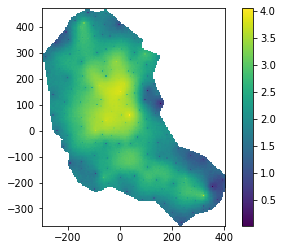

In [7]:
import matplotlib.pylab as plt

plt.imshow(np.log10(mean_flux), extent = extent)
plt.colorbar()
plt.show()

In [8]:
import pickle as p

p.dump((X, Y, mean_flux), open('results/mean_sgs_flux.p', 'wb'))